# **Chapter 5 합성곱 신경망I**

### **[개념 정리]**

#### **5.1 합성곱 신경망**

##### **5.1.1 합성곱층의 필요성**

합성곱 신경망
> 이미지 전체를 한 번에 계산하는 것이 아닌 이미지의 국소적 부분을 계산함으로써 시간과 자원을 절약하여 이미지의 세밀한 부분까지 분석할 수 있는 신경망
- 이미지나 영상 처리에 유용

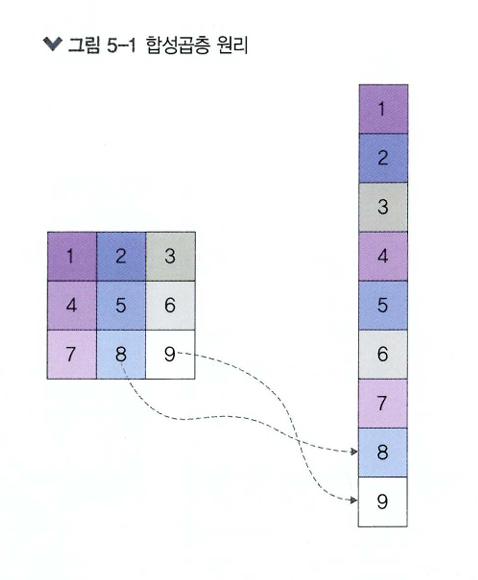

위 그림처럼 배열을 펼쳐서 각 픽셀에 가중치를 곱하여 은닉층으로 전달하게 되면, 데이터의 공간적 구조를 무시하게 됨
- 이를 방지하기 위해 도입된 것이 합성곱층

##### **5.1.2 합성곱 신경망 구조**

합성곱 신경망(Convolutional Neural Network)
> 음성 인식이나 이미지/영상 인식에서 주로 사용되는 신경망
>
> 다차원 배열 데이터를 처리하도록 구성되어 컬러 이미지 같은 다차원 배열 처리에 특화
> - 합성곱층과 풀링층을 거치며 입력 이미지의 주요 특성 벡터 추출
> - 이후 추출된 주요 특성 벡터들은 완전 연결층을 거치며 1차원 벡터로 변환, 마지막으로 출력층에서 활성화 함수인 소프트맥스(softmax) 함수를 사용하여 최종 결과 출력
> 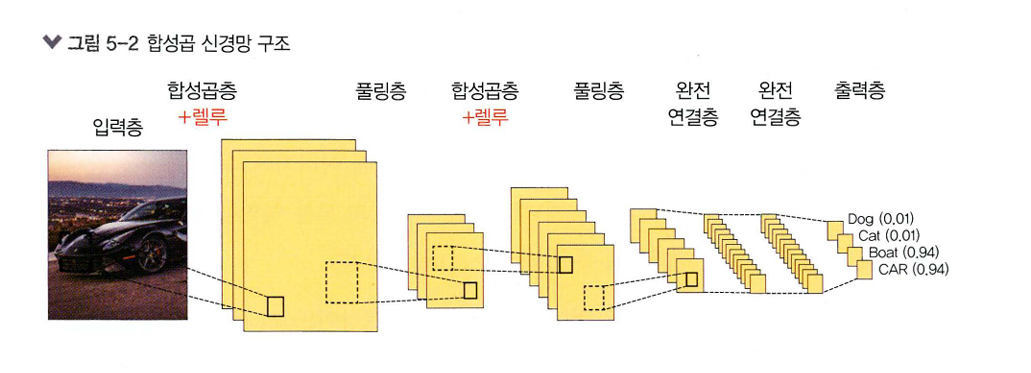

1. 입력층(input layer)
> 입력 이미지 데이터가 최초로 거치게 되는 계층
> - 이미지: 높이(Height), 너비(Width), 채널(Channel)의 값을 갖는 3차원 데이터
- 채널: 이미지가 그레이스케일(gray scale)이면 1, 컬러(RGB)면 3
> 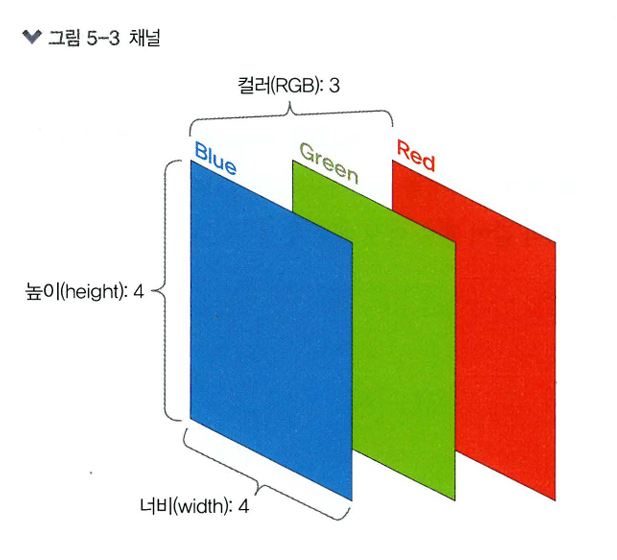




2. 합성곱층(convolutional layer)
> 입력 데이터에서 특성을 추출하는 역할 수행

- 특성 추출 과정
1. 입력 이미지가 들어오면, 이미지에 대한 특성을 감지하기 위해 커널(kernel)이나 필터 사용
2. 이 커널, 필터는 이미지의 모든 영역을 훑으면서 특성을 추출하게 됨
3. 이렇게 추출된 결과물이 특성 맵(feature map)
  - 커널은 3 x 3, 5 x 5 크기로 적용되는 것이 일반적
  - 스트라이드(stride): 지정된 간격

ex) 그레이스케일 & 스트라이드 = 1 일 때의 특성 추출

Step1. 입력 이미지에 3 x 3 필터 적용
- 입력 이미지와 필터를 포개 놓고 대응되는 숫자끼리 곱한 후 모두 더함

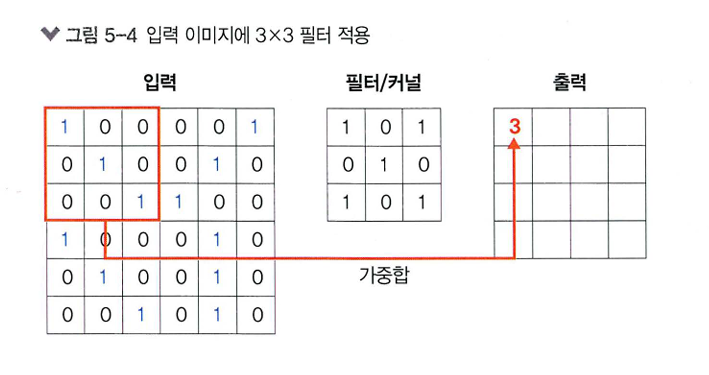

(1 x 1) + (0 x 0) + (0 x 1) + (0 x 0) + (1 x 1) + (0 x 0) + (0 x 1) + (0 x 0) + (1 x 1) = 3

Step2. 필터가 1만큼 이동
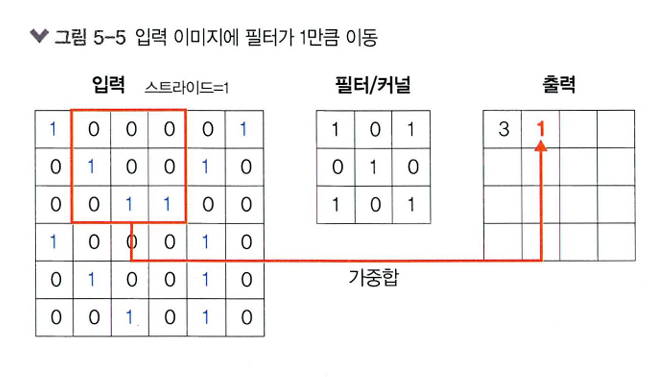

(0 x 1) + (0 x 0) + (0 x 1) + (1 x 0) + (0 x 1) + (0 x 0) + (0 x 1) + (1 x 0) + (1 x 1) = 1

Step3. 필터가 1만큼 두 번째 이동

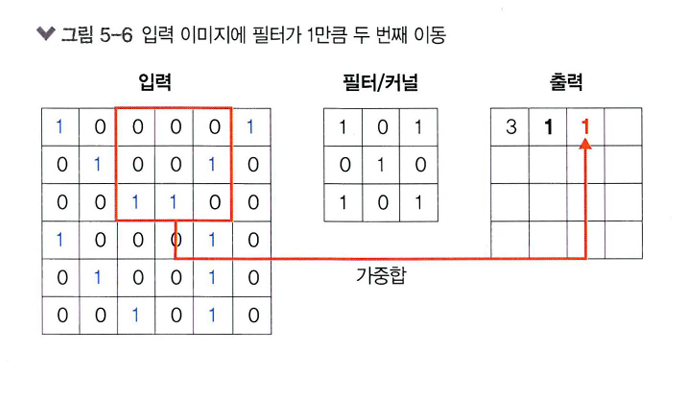

(0 x 1) + (0 x 0) + (0 x 1) + (0 x 0) + (0 x 1) + (1 x 0) + (1 x 1) + (1 x 0) + (0 x 1) = 1

위 Step을 반복

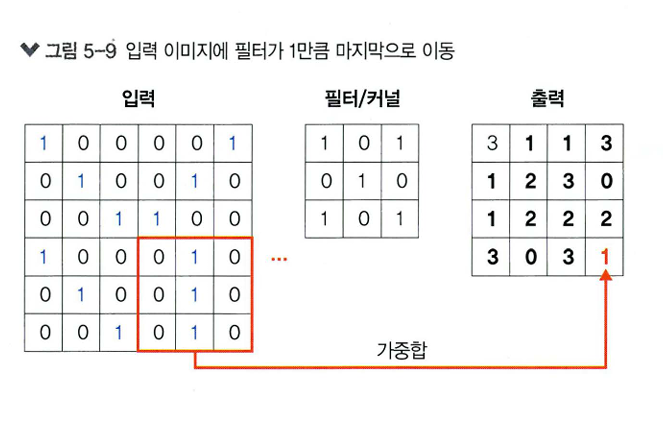

커널과 스트라이드의 상호 작용으로 원본 (6, 6, 1) 크기가 (4, 4, 1) 크기의 특성 맵으로 축소

ex) 컬러 이미지의 합성곱

[유의점]
1. 필터의 채널이 3
  - 실제 필터의 개수는 1개!
2. RGB 각각에 서로 다른 가중치로 합성곱을 적용 후 결과를 더해 주는 것

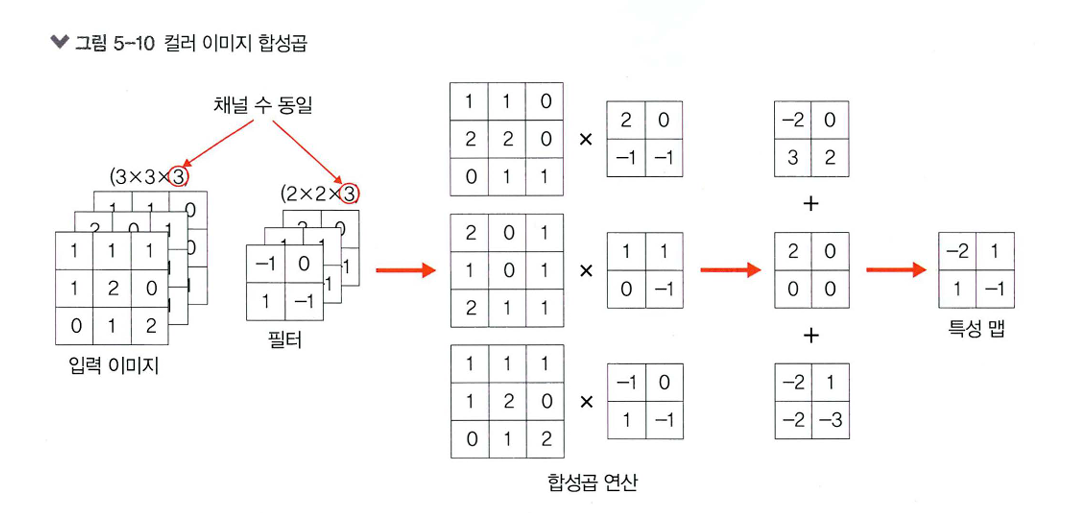

ex) 필터의 개수가 2개 이상

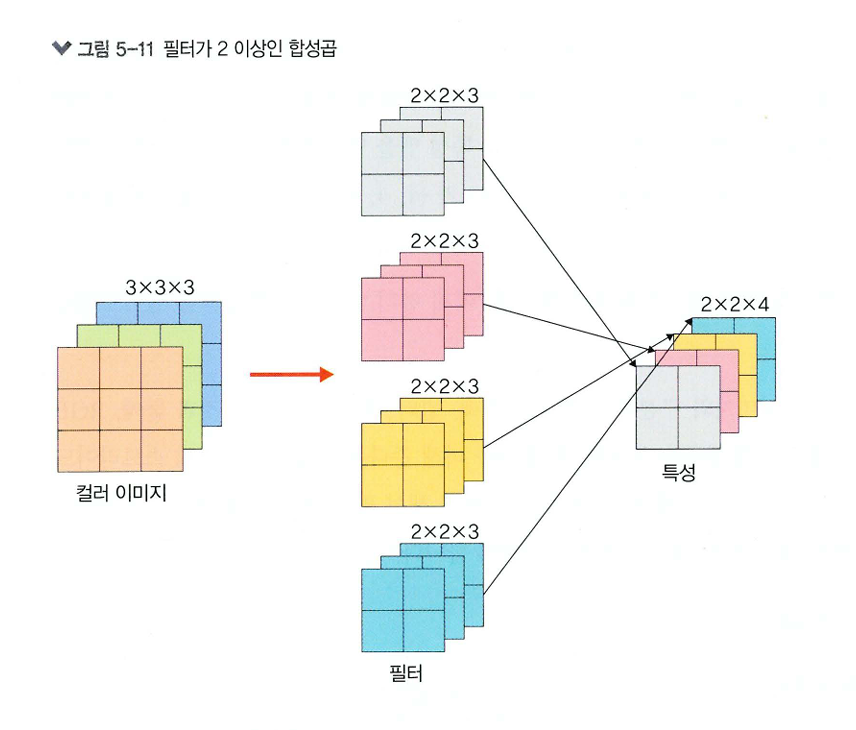

3. 풀링층(pooling layer)
> 합성곱층과 유사하게 특성 맵의 차원을 다운 샘플링하여 연산량을 감소시키고, 주요 특성 벡터를 추출하여 학습을 효과적으로 할 수 있도록 함
- 다운 샘플링(sub-sampling): 이미지 축소

1. 최대 풀링(max pooling)
> 대상 영역에서 최댓값을 추출

2. 평균 풀링(average pooling)
> 대상 영역에서 평균을 반환

- 대부분의 합성곱 신경망에서는 최대 풀링 사용
> 평균 풀링은 각 커널 값을 평균화시켜 가중치를 갖는 값의 특성이 희미해질 수 있기 때문

ex) 최대 풀링 과정

- 첫 번째 최대 풀링 과정

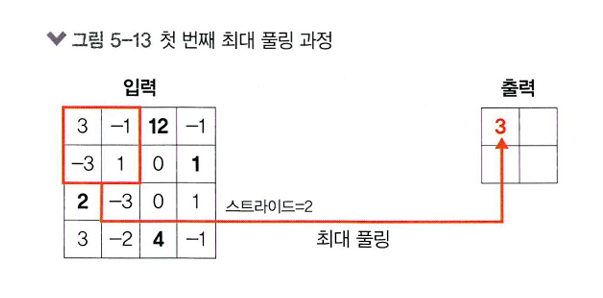

[최대 풀링과 평균 풀링 비교]

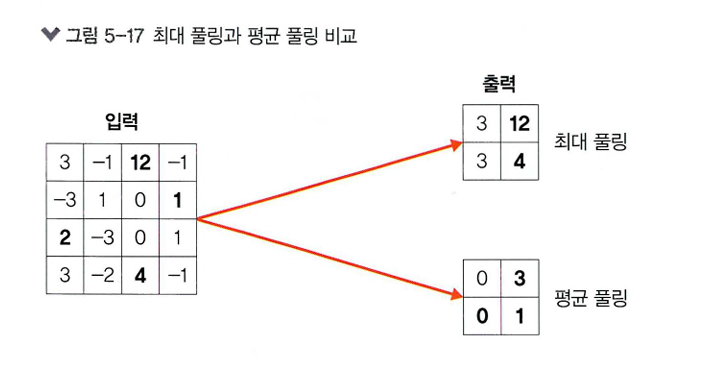

4. 완전 연결층(fully connected layer)
> 합성곱층과 풀링층을 거치며, 차원이 축소된 특성 맵은 최종적으로 완전연결층으로 전달
> - 이 과정에서 3차원 벡터인 이미지가 1차원 벡터로 Flattening 됨

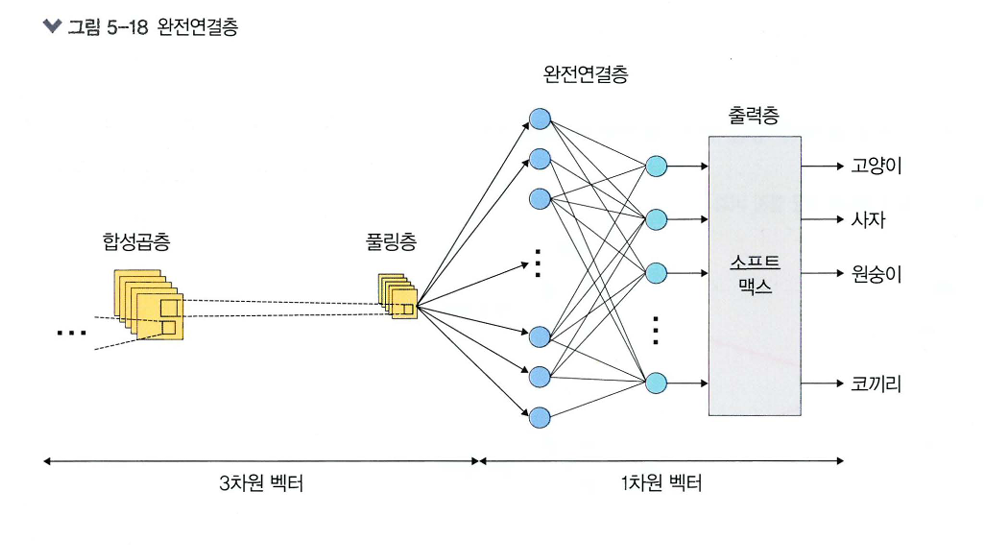

5. 출력층
> 소프트맥스 활성화 함수 사용 -> 입력받은 값을 0~1 사이의 값으로 출력
> - 마지막 출력층의 소프트맥스 함수를 사용하여 이미지가 각 레이블(Label)에 속할 확률 값이 출력 -> 가장 높은 확률 값을 갖는 레이블이 최종 값으로 선정

##### **5.1.3 1D, 2D, 3D 합성곱**

**1D 합성곱**
> 필터가 시간을 축으로 좌우로만 이동할 수 있는 합성곱
> - 입력(W)과 필터(k)에 대한 출력은 W

ex) 입력이 [1, 1, 1, 1, 1]이고 필터기 [0.25, 0.5, 0.25] -> 출력은 [1, 1, 1]

**2D 합성곱**
> 필터가 방향 2개로 움직이는 형태
> - 입력(W, H)과 필터(k, k)에 대한 출력은 (W, H) (출력 형태는 2D 행렬)

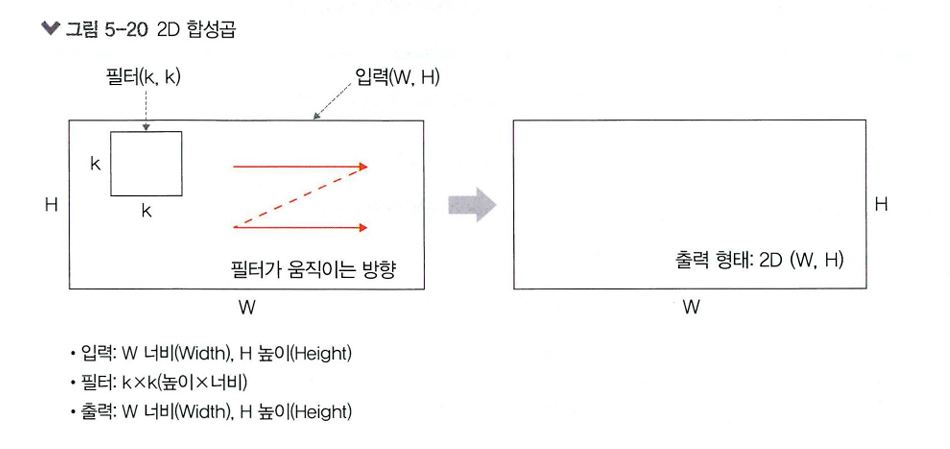

**3D 합성곱**
> 필터가 움직이는 방향이 3개
> - 입력(W, H, L)에 대해 필터(k, k, d)를 적용 -> 출력은 (W, H, L)
- d < L를 유지하는 것이 중요

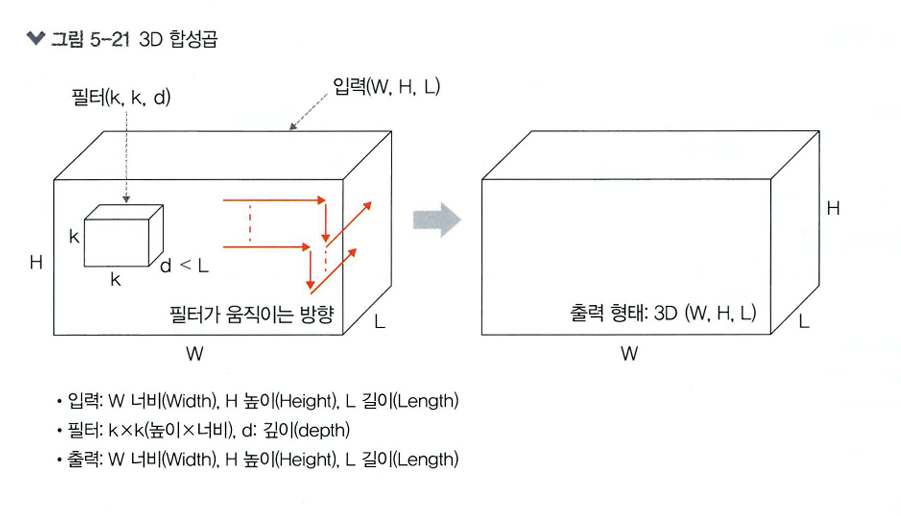

**3D 입력을 갖는 2D 합성곱**

ex) 입력이 (224 x 224 x3， 112 X 112 X 32)와같은 3D 형태
- 하지만, 출력 형태가 3D가 아닌 2D 행렬을 취하는 것 = '3D 입력을 갖는 2D 합성곱'

> 입력(W, H, L)과 필터(k, k, L) 적용 -> 출력 (W, H)
> - 여기서 필터는 2개의 방향으로 움직이며, 출력 형태는 2D 행렬이 됨

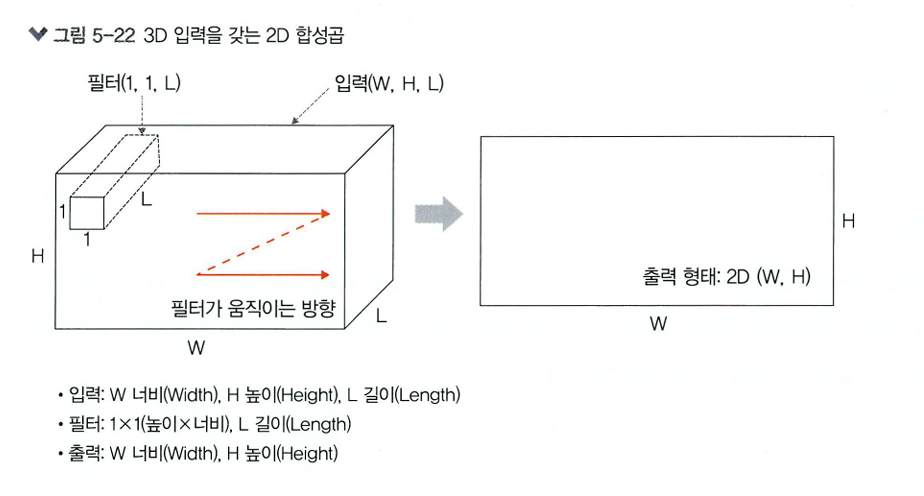



**1 x 1 합성곱**
> 3D 형태로 입력
> 입력(W, H, L)에 필터(1, 1, L)를 적용 -> 출력 (W, H)

- 1 x 1 합성곱에서 채널 수를 조정하여 연산량이 감소되는 효과 존재